In [74]:
# Necessary Libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
# For k-means clustering
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [75]:
# Read dataset
df=pd.read_csv("data.csv")

In [76]:
# Display Dataset
df.head()

,Unnamed: 0,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
0,0,alfa-romeo,Alfa Romeo GTV,red,10/1995,1995,1300,148,201,Manual,Petrol,"10,9 l/100 km",260 g/km,160500.0,2.0 V6 TB
1,1,alfa-romeo,Alfa Romeo 164,black,02/1995,1995,24900,191,260,Manual,Petrol,NaN,- (g/km),190000.0,"Q4 Allrad, 3.2L GTA"
2,2,alfa-romeo,Alfa Romeo Spider,black,02/1995,1995,5900,110,150,Unknown,Petrol,NaN,- (g/km),129000.0,ALFA ROME 916
3,3,alfa-romeo,Alfa Romeo Spider,black,07/1995,1995,4900,110,150,Manual,Petrol,"9,5 l/100 km",225 g/km,189500.0,2.0 16V Twin Spark L
4,4,alfa-romeo,Alfa Romeo 164,red,11/1996,1996,17950,132,179,Manual,Petrol,"7,2 l/100 km",- (g/km),96127.0,"3.0i Super V6, absoluter Topzustand !"


In [77]:
# Display information about dataset
# Begin of data preprocessing
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251079 entries, 0 to 251078
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                251079 non-null  int64  
 1   brand                     251079 non-null  object 
 2   model                     251079 non-null  object 
 3   color                     250913 non-null  object 
 4   registration_date         251075 non-null  object 
 5   year                      251079 non-null  object 
 6   price_in_euro             251079 non-null  object 
 7   power_kw                  250945 non-null  object 
 8   power_ps                  250950 non-null  object 
 9   transmission_type         251079 non-null  object 
 10  fuel_type                 251079 non-null  object 
 11  fuel_consumption_l_100km  224206 non-null  object 
 12  fuel_consumption_g_km     251079 non-null  object 
 13  mileage_in_km             250927 non-null  f

In [78]:
# Drop columns that will not contribute to the model.
# Drop column registration_date because it looks a lot like year. Same year only as an extra there is a month.
df.drop(columns=['Unnamed: 0', 'offer_description', 'registration_date'], inplace=True)

# Display total null value number column by column
df.isnull().sum()

,0
brand,0
model,0
color,166
year,0
price_in_euro,0
power_kw,134
power_ps,129
transmission_type,0
fuel_type,0
fuel_consumption_l_100km,26873


In [79]:
# Fill in empty categorical data (color) with unknown
df['color'] = df['color'].fillna('unknown')

# Display total null value number column by column
df.isnull().sum()

,0
brand,0
model,0
color,0
year,0
price_in_euro,0
power_kw,134
power_ps,129
transmission_type,0
fuel_type,0
fuel_consumption_l_100km,26873


In [80]:
# Converting numeric objects to numeric variables
df['fuel_consumption_l_100km'] = df['fuel_consumption_l_100km'].str.replace(' l/100 km', '', regex=False)
df['fuel_consumption_l_100km'] = df['fuel_consumption_l_100km'].str.replace(',', '.', regex=False)
df['fuel_consumption_l_100km'] = pd.to_numeric(df['fuel_consumption_l_100km'], errors='coerce')

df['fuel_consumption_g_km'] = df['fuel_consumption_g_km'].replace(r'-.*', pd.NA, regex=True)
df['fuel_consumption_g_km'] = df['fuel_consumption_g_km'].str.replace(' g/km', '', regex=False)
df['fuel_consumption_g_km'] = pd.to_numeric(df['fuel_consumption_g_km'], errors='coerce')

df['price_in_euro'] = df['price_in_euro'].str.replace(' €', '', regex=False)
df['price_in_euro'] = df['price_in_euro'].str.replace('.', '', regex=False)
df['price_in_euro'] = pd.to_numeric(df['price_in_euro'], errors='coerce')

df['power_kw'] = pd.to_numeric(df['power_kw'], errors='coerce')

df['power_ps'] = pd.to_numeric(df['power_ps'], errors='coerce')

# Display total null value number column by column
df.isnull().sum()

,0
brand,0
model,0
color,0
year,0
price_in_euro,199
power_kw,293
power_ps,210
transmission_type,0
fuel_type,0
fuel_consumption_l_100km,29172


In [81]:
# Fill missing numeric values with the mean
df['fuel_consumption_l_100km'] = df['fuel_consumption_l_100km'].fillna(df['fuel_consumption_l_100km'].mean())
df['fuel_consumption_g_km'] = df['fuel_consumption_g_km'].fillna(df['fuel_consumption_g_km'].mean())
df['price_in_euro'] = df['price_in_euro'].fillna(df['price_in_euro'].mean())
df['power_kw'] = df['power_kw'].fillna(df['power_kw'].mean())
df['power_ps'] = df['power_ps'].fillna(df['power_ps'].mean())
df['mileage_in_km'] = df['mileage_in_km'].fillna(df['mileage_in_km'].mean())

# Display total null value number column by column
df.isnull().sum();

In [82]:
# Display information about dataset
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251079 entries, 0 to 251078
Data columns (total 12 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   brand                     251079 non-null  object 
 1   model                     251079 non-null  object 
 2   color                     251079 non-null  object 
 3   year                      251079 non-null  object 
 4   price_in_euro             251079 non-null  float64
 5   power_kw                  251079 non-null  float64
 6   power_ps                  251079 non-null  float64
 7   transmission_type         251079 non-null  object 
 8   fuel_type                 251079 non-null  object 
 9   fuel_consumption_l_100km  251079 non-null  float64
 10  fuel_consumption_g_km     251079 non-null  float64
 11  mileage_in_km             251079 non-null  float64
dtypes: float64(6), object(6)
memory usage: 23.0+ MB


,brand,model,color,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km
0,alfa-romeo,Alfa Romeo GTV,red,1995,1300.0,148.0,201.0,Manual,Petrol,10.900000,260.000000,160500.0
1,alfa-romeo,Alfa Romeo 164,black,1995,24900.0,191.0,260.0,Manual,Petrol,6.487279,140.802646,190000.0
2,alfa-romeo,Alfa Romeo Spider,black,1995,5900.0,110.0,150.0,Unknown,Petrol,6.487279,140.802646,129000.0
3,alfa-romeo,Alfa Romeo Spider,black,1995,4900.0,110.0,150.0,Manual,Petrol,9.500000,225.000000,189500.0
4,alfa-romeo,Alfa Romeo 164,red,1996,17950.0,132.0,179.0,Manual,Petrol,7.200000,140.802646,96127.0


In [83]:
top5_colors = df['color'].value_counts().nlargest(5).index

df['color'] = df['color'].apply(lambda x: x if x in top5_colors else 'others')


In [84]:
top5_brands = df['brand'].value_counts().nlargest(5).index

df['brand'] = df['brand'].apply(lambda x: x if x in top5_brands else 'others')


In [85]:
top5_models = df['model'].value_counts().nlargest(5).index

df['model'] = df['model'].apply(lambda x: x if x in top5_models else 'others')

In [86]:
df['year'] = pd.to_numeric(df['year'], errors='coerce')

df['year'] = df['year'].fillna(df['year'].median())

print(df['year'].dtype)  # float64

float64


In [87]:
top5_fuels = df['fuel_type'].value_counts().nlargest(5).index

df['fuel_type'] = df['fuel_type'].apply(lambda x: x if x in top5_fuels else 'others')

In [88]:
print(f"Unique values")
for column in df.columns:
    print(f"{column}: {df[column].nunique()}")

Unique values
brand: 6
model: 6
color: 6
year: 33
price_in_euro: 18081
power_kw: 512
power_ps: 521
transmission_type: 4
fuel_type: 6
fuel_consumption_l_100km: 268
fuel_consumption_g_km: 492
mileage_in_km: 71767


In [89]:
le = LabelEncoder()
df['color_encoded'] = le.fit_transform(df['color'])
df['brand_encoded'] = le.fit_transform(df['brand'])
df['model_encoded'] = le.fit_transform(df['model'])
df['fuel_type_encoded'] = le.fit_transform(df['fuel_type'])
df['transmission_type_encoded'] = le.fit_transform(df['transmission_type'])

df = df.drop('color', axis=1)
df = df.drop('brand', axis=1)
df = df.drop('model', axis=1)
df = df.drop('fuel_type', axis=1)
df = df.drop('transmission_type', axis=1)

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251079 entries, 0 to 251078
Data columns (total 12 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   year                       251079 non-null  float64
 1   price_in_euro              251079 non-null  float64
 2   power_kw                   251079 non-null  float64
 3   power_ps                   251079 non-null  float64
 4   fuel_consumption_l_100km   251079 non-null  float64
 5   fuel_consumption_g_km      251079 non-null  float64
 6   mileage_in_km              251079 non-null  float64
 7   color_encoded              251079 non-null  int64  
 8   brand_encoded              251079 non-null  int64  
 9   model_encoded              251079 non-null  int64  
 10  fuel_type_encoded          251079 non-null  int64  
 11  transmission_type_encoded  251079 non-null  int64  
dtypes: float64(7), int64(5)
memory usage: 23.0 MB


In [91]:
from sklearn.feature_selection import mutual_info_regression
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif

In [92]:
y = df["price_in_euro"]
X = df.drop(columns=["price_in_euro"])

In [93]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [94]:
mi_scores = mutual_info_regression(X_scaled, y, random_state=17)

mi_series = pd.Series(mi_scores, index=X.columns)

for feature, score in mi_series.items():
    print(f"{feature}: {score:.4f}")

year: 0.5214
power_kw: 0.5944
power_ps: 0.5913
fuel_consumption_l_100km: 0.2521
fuel_consumption_g_km: 0.3364
mileage_in_km: 0.4123
color_encoded: 0.0447
brand_encoded: 0.0826
model_encoded: 0.0400
fuel_type_encoded: 0.0809
transmission_type_encoded: 0.1790


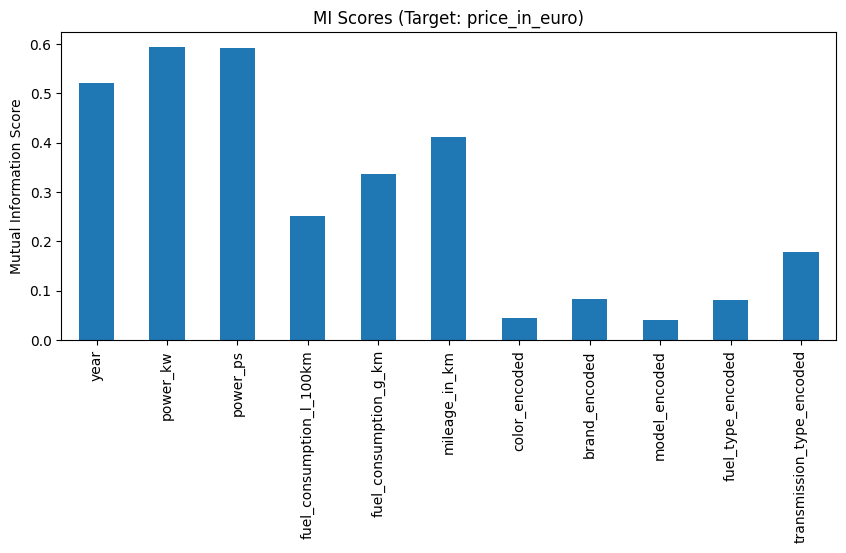

In [95]:
plt.figure(figsize=(10, 4))
mi_series.plot.bar()
plt.ylabel("Mutual Information Score")
plt.title("MI Scores (Target: price_in_euro)")
plt.show()

In [96]:
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split

In [97]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=17
)

print("Training set rows:", X_train.shape[0])
print("Test set rows:", X_test.shape[0])

Training set rows: 188309
Test set rows: 62770


In [98]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

lasso = LassoCV(
    cv=5,
    random_state=17,
    n_jobs=-1
)

lasso.fit(X_train_scaled, y_train)

print("Best alpha chosen:", lasso.alpha_)

Best alpha chosen: 42.23159300081515


In [99]:
coefs = lasso.coef_

features = X.columns.tolist()

coef_series = pd.Series(coefs, index=features)

print("Feature's Lasso Coefficients:\n")
print(coef_series[coef_series.index])

Feature's Lasso Coefficients:

year                           208.361413
power_kw                      4233.273628
power_ps                     19002.372861
fuel_consumption_l_100km         6.897627
fuel_consumption_g_km         1211.547647
mileage_in_km                -9153.008225
color_encoded                  672.028196
brand_encoded                 3381.522462
model_encoded                  534.561367
fuel_type_encoded            -2145.410053
transmission_type_encoded     1323.365214
dtype: float64


In [100]:
y = df["fuel_type_encoded"]

X = df.drop(columns=["fuel_type_encoded"])
X_scaled = X.copy()

In [101]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=5, random_state=17)
clf.fit(X_scaled, y)
dt_importances = pd.Series(clf.feature_importances_, index=X_scaled.columns)
print("Decision Tree–based Information Gain:\n")
print(dt_importances)

Decision Tree–based Information Gain:

year                         0.000000
price_in_euro                0.096370
power_kw                     0.140426
power_ps                     0.016126
fuel_consumption_l_100km     0.407469
fuel_consumption_g_km        0.095412
mileage_in_km                0.219883
color_encoded                0.000000
brand_encoded                0.000554
model_encoded                0.000000
transmission_type_encoded    0.023760
dtype: float64
